In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = '/kaggle/input/sentiment-prediction-on-movie-reviews/'
data_dir = './'

movies = pd.read_csv(data_dir+'movies.csv')
sample = pd.read_csv(data_dir+'sample.csv')
train = pd.read_csv(data_dir+'train.csv')
test = pd.read_csv(data_dir+'test.csv')

In [3]:
train.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


In [5]:
train.isna().sum()

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

In [6]:
bools = ['False', 'True']
values = train.isFrequentReviewer.value_counts().to_list()
train.isFrequentReviewer.value_counts().to_frame()

,isFrequentReviewer
False,113189
True,49569


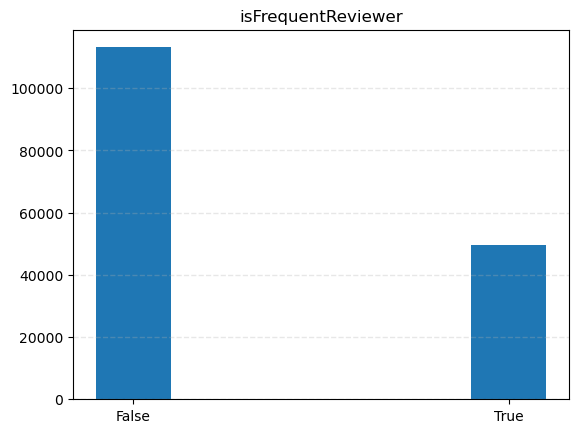

In [7]:
plt.bar(bools, values, width=0.2)
plt.title('isFrequentReviewer')
plt.grid(True, axis='y', linestyle='--', linewidth=1, alpha=0.3)
plt.show()

In [8]:
train.movieid.value_counts()

escape_the_terminator_tyler_durden_astonish    708
fantasy_forrest_gump_intrigue                  245
james_t._kirk_marty_mcfly_astonish             186
marvelous_lara_croft_luke_skywalker            140
michael_corleone_v_marty_mcfly_tony_stark      138
                                              ... 
james_bond_legend_marty_mcfly_elegant            1
myriad_aurora_edward_scissorhands                1
mystic_ferris_bueller_spectacular                1
crimson_velvet                                   1
forrest_gump_fantasy_epic                        1
Name: movieid, Length: 16812, dtype: int64

In [9]:
train.movieid.value_counts().to_frame().describe()

,movieid
count,16812.000000
mean,9.681061
std,12.522696
min,1.000000
25%,2.000000
50%,5.000000
75%,13.000000
max,708.000000


In [10]:
sentiments = ['POSITIVE', 'NEGATIVE']
values = train.sentiment.value_counts().to_list()
train.sentiment.value_counts().to_frame()

,sentiment
POSITIVE,108761
NEGATIVE,53997


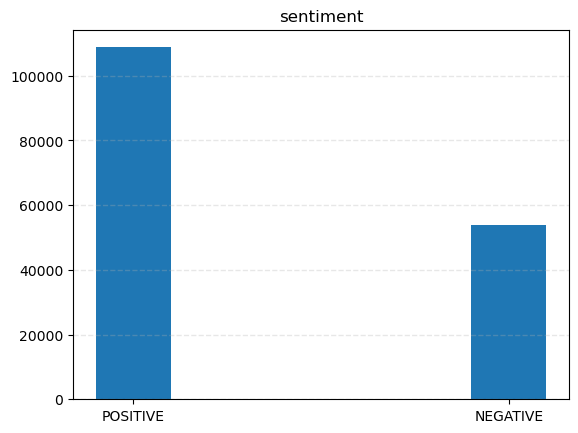

In [11]:
plt.bar(sentiments, values, width=0.2)
plt.title('sentiment')
plt.grid(True, axis='y', linestyle='--', linewidth=1, alpha=0.3)
plt.show()

> Highly class imbalanced

In [12]:
train.groupby(by='movieid').reviewerName.value_counts(sort=True, ascending=False)

movieid                                 reviewerName    
adventure_captain_america_harry_potter  Andrew Kramer       1
                                        Anna Swanson        1
                                        Carolyn Torres      1
                                        David Allison       1
                                        Derek Hickman       1
                                                           ..
zephyr_wolverine_vito_corleone          Patrick Woods       1
                                        Robyn Wallace       1
                                        Selena Johnson      1
                                        Tracey Townsend     1
zephyr_wonder_woman                     Oscar Daniel Jr.    1
Name: reviewerName, Length: 161205, dtype: int64

> It shows there is no repetation of reviewers for a specific movie.

In [13]:
train[train.sentiment=='POSITIVE'].reviewText.reset_index(drop=True).loc[10]

'The Amazing Johnathan Documentary is ingeniously constructed, a hilarious thrill ride and the underdog story of the year.'

In [14]:
train[train.sentiment=='NEGATIVE'].reviewText.reset_index(drop=True).loc[50]

'"Small Time" has its heart in the right place, but its screenplay\'s in serious need of a tuneup.'

In [3]:
test[~test.reviewerName.isin(train.reviewerName)].reviewerName.nunique()

138

In [4]:
test.reviewerName.nunique()

4495

> There exists `reviewerName` i.e., not in training data.
> This shows we can not take `reviewerName` as a categorical feature while training the model.

In [16]:
train.groupby(by='reviewerName').isFrequentReviewer.value_counts(sort=True, ascending=False)

reviewerName       isFrequentReviewer
Aaron Andrews      True                   28
                   False                   2
Aaron Doyle        False                  15
Aaron Evans        True                    3
Aaron Foster MD    False                 127
                                        ... 
Zachary Riggs      False                  23
Zachary Salazar    False                  13
Zachary Schneider  True                    2
Zoe Anthony        False                  53
                   True                   10
Name: isFrequentReviewer, Length: 4994, dtype: int64

In [17]:
test.groupby(by='reviewerName').isTopCritic.value_counts(sort=True, ascending=False)

reviewerName       isTopCritic
Aaron Andrews      True            8
Aaron Doyle        False           6
Aaron Evans        True            1
Aaron Foster MD    False          39
                   True            5
                                  ..
Zachary Riggs      False          10
Zachary Salazar    False           1
Zachary Schneider  True            1
Zoe Anthony        False          18
                   True            4
Name: isTopCritic, Length: 4823, dtype: int64

In [5]:
train.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE
